# Session 1: File Handling & Dive into NumPy

**Objective:** To refresh file I/O concepts and build a foundation in NumPy for advanced data manipulation.

## Part 0: Basic Concepts

How to access to jupyterlab?



### On your laptop

Access the VM.

```ssh vm``` 

Then **THE FIRST TIME ONLY** to install jupyterlab:

1) install the virtual environment for python ```apt install python3.12-venv```
2) change to user "ubuntu" with ```su ubuntu```
3) move back to your home with ```cd```
4) create a virtual environment ```python3 -m venv MDMC```
5) ```source ./MDMC/bin/activate```
6) ```pip install jupyterlab```

**ALL OTHER TIMES**:

1) change to user "ubuntu" with ```su ubuntu```
2) move back to your home with ```cd```
3) activate the environment ```source ./MDMC/bin/activate```
4) start jupyter lab: ```jupyter lab --no-browser --ip "*"```
5) Copy and paste the jupyter url in a browser on your *local* computer.

### 0. Python Fundamentals Warm-up

Before diving into more advanced topics, let's quickly review the basic building blocks of Python code.

**Use the jupyter notebooks:** Blocks can be code or markdown, and you can run them either using the icons or by ```shift+enter``` combo.

**Defining a Function:** Functions are reusable blocks of code that perform a specific action. You define them using the `def` keyword.

In [ ]:
def greet(name, surname="Deer", **kwargs):
    """This function greets the person passed in as a parameter."""
    if 'nickname' in kwargs.keys():
        return f"Hello, {name} {kwargs['nickname']} {surname}!"
    else:
        return f"Hello, {name} {surname}!"


In [ ]:
help(greet)

In [ ]:
# Call the function
message = greet("World")
print(message)

# Call the function with optional inputs
message = greet("John", surname="Wick", nickname="Jr.")
print(message)

**Defining a Class:** Classes are blueprints for creating objects. They bundle data (attributes) and functions (methods) that work on that data.

In [ ]:
class Dog:
    # The __init__ method is the constructor, run when an object is created
    def __init__(self, name, age):
        self.name = name  # Attribute
        self.age = age    # Attribute

    # A method
    def bark(self):
        return f"{self.name} says woof!"

# Create an instance (object) of the Dog class
my_dog = Dog("Rex", 5)
print(my_dog.name)
print(my_dog.bark())

**Importing a Module:** Modules are Python files with functions, classes, and variables that you can use in your own scripts. You use the `import` statement.

In [ ]:
! pip install numpy matplotlib

In [ ]:
# Import the entire 'math' module
import math
print(math.sqrt(16)) # Use dot notation: module.function()

# Import a specific function from a module
from math import pi
print(pi)

# Import a module with an alias (a shorter name)
import numpy as np

# Modules also have methods
numbers = [0.1, 0.3, 0.5, 0.7]
numbers_np = np.array(numbers)
print(f"numbers is now a numpy array: {numbers_np}, its content sum up to {numbers_np.sum()}" )

### 1. File I/O Review

We often need to read data from or write data to files. Python has robust built-in capabilities for this.

**Reading a `.txt` file:**

In [ ]:
# First, let's create a file to read
with open('example.txt', 'w') as f:
    f.write("Hello from the file!\nThis is the second line.")

# Read all the file in one string
with open('example.txt', 'r') as f:
    content = f.read()
    print(content)
    
# Read all lines as a lis
with open('example.txt', 'r') as f:
    content = f.readlines()
    print(content)

**Reading a structured `.csv` file (using the `csv` module):**

In [ ]:
import csv

# Create a csv file to read
with open('data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['name', 'age', 'city'])
    writer.writerow(['Alice', 30, 'New York'])
    writer.writerow(['Bob', 25, 'Los Angeles'])

with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

**Reading a structured `.json` file:**

In [ ]:
import json

# Create a json file to read
data_to_write = {'name': 'Charlie', 'skills': ['python', 'data analysis']}
with open('data.json', 'w') as f:
    json.dump(data_to_write, f)

with open('data.json', 'r') as f:
    data = json.load(f)
    print(data)

### Lab 1.1: Load JSON Data

* **Task:** Create a file named `products.json` with data about products. Write a Python script to load this JSON file and print the name of the second product.

In [ ]:
import json

products_data = [
      {"id": "p001", "name": "Laptop", "price": 1200},
      {"id": "p002", "name": "Monitor", "price": 350},
      {"id": "p003", "name": "Keyboard", "price": 75}
]

with open('products.json', 'w') as f:
    json.dump(products_data, f)

with open('products.json', 'r') as f:
    products = json.load(f)

# The data is a list of dictionaries. Access the second element (index 1)
# and then its 'name' key.
print(products[1]['name'])

## Part 1: ```numpy```

#### NumPy `ndarray` Dive

NumPy's core object is the `ndarray` (n-dimensional array). It's faster and more memory-efficient than Python lists for numerical operations.

In [ ]:
import numpy as np

# Create a 1D array from a list
list_a = [1, 2, 3, 4]
array_a = np.array(list_a)
print(f"1D Array: {array_a}")
print(f"Shape: {array_a.shape}")
print(f"Data type: {array_a.dtype}")

# Create a 2D array (matrix)
list_b = [[1, 2, 3], [4, 5, 6]]
array_b = np.array(list_b)
print(f"\n2D Array:\n{array_b}")
print(f"Shape: {array_b.shape}")

#### (but why ```numpy```?)

In [ ]:
long_list = [ i*0.1 for i in range(10000)]

def calculate_total_sum(long_list):
    tot = 0.
    for el in long_list:
        tot += el
    return tot

%timeit calculate_total_sum(long_list)


In [ ]:
long_list_numpy = np.array(long_list)
%timeit long_list_numpy.sum()

### 3. Advanced Indexing & Slicing

NumPy offers powerful ways to select data.

**Boolean Masking:** Use a boolean condition to filter the array.

In [ ]:
arr = np.array([10, 20, 30, 40, 50])
# Select elements greater than 25
mask = arr > 25
print(f"Boolean Mask: {mask}")
print(f"Filtered Array: {arr[mask]}")

**Fancy Indexing:** Use a list of indices to select specific elements.

In [ ]:
arr = np.array([10, 20, 30, 40, 50, 60])
# Select the 1st, 3rd, and 4th elements
indices = [0, 2, 3]
print(f"Fancy Indexing: {arr[indices]}")

### 4. Vectorization and Broadcasting

**Vectorization:** Operations are applied to entire arrays at once, element-by-element. This is much faster than using a Python `for` loop.

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([10, 20, 30])

# Vectorized addition (no loop needed!)
result = arr1 + arr2 
print(f"Vectorized Sum: {result}")

**Broadcasting:** NumPy's ability to perform operations on arrays of different (but compatible) shapes.

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
scalar = 100

# The scalar is "broadcast" to each element
result = arr + scalar
print(f"Broadcasting result:\n{result}")

"When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

- they are equal, or
- one of them is 1.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one."



 

In [ ]:
# working
A = np.random.random(size = (8,1,6,1) )
B = np.random.random(size = (7,1,5) )

print(f"the first result has shape: { (A * B).shape}")

# not working
A = np.random.random(size = (8,6) )
B = np.random.random(size = (7,5) )

print(f"the result has shape: { (A * B).shape}")



```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

What happens in the additional dimensions? The values get repeated as necessary.

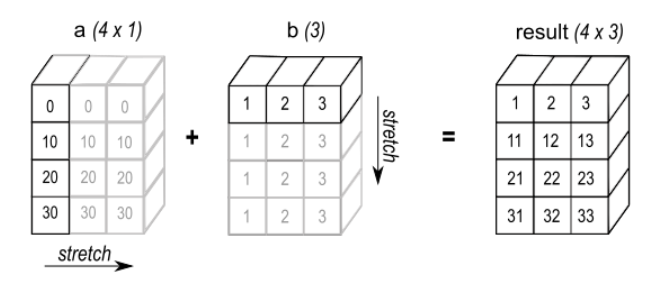

### 5. Mathematical and Statistical Functions

NumPy has a huge library of optimized functions. (like here: https://numpy.org/doc/stable/reference/routines.html )

In [ ]:
data = np.array([10, 15, 22, 31, 50])

print(f"Sum: {np.sum(data)}")
print(f"Mean: {np.mean(data)}")
print(f"Standard Deviation: {np.std(data)}")
print(f"Max: {np.max(data)}")

Very helpful built-in functions.

In [ ]:
print(f"Shape: {data.shape}")

dims = (10,2,1)

init_to_zero = np.zeros(dims)

print("\n", init_to_zero, f"which has shape {init_to_zero.shape}")

A stand-alone method inside of numpy which is very relevant is ``` random```.

In [ ]:
from numpy import random

print( f"Randint: {random.randint(low=0, high=5, size=(10,)) }")

print( f"Choice: {random.choice(['a', 'b', 'c'], size = 3)}" )

print( f"Random uniform: {random.random(size=(10,3))}")

print( f"Random normal distribution: {random.standard_normal(size=(2,3))}")

```numpy``` contains also all standard algebra operations, such as matrix multiplication, diagonalizations etc. etc.

In [ ]:
A = random.standard_normal( size = (4,8) )
B = random.standard_normal( size = (8,3) )

print(f"A @ B: {np.matmul(A,B)}") 

# shorthand
print(f"A @ B: {A @ B}") 

print(f"transpose(A): {np.transpose(A)}")
print(f"transpose(A): {A.T}")

eigenvalues, eigenvectors = np.linalg.eig( A @ A.T )

print(f"eigenvals: {eigenvalues}")
print(f"eigenvectors: {eigenvectors}")

Some other important functions

In [ ]:
print(f"Linear spacing, 10 points from 0 to 1 (included) {np.linspace(0,1,10)}")
print(f"Logarithmic spacing, 10 points from 10^0=1 to 10^1=10 (included) {np.logspace(0,1,10)}")

## Exercises & Debugging

### Lab 2.1: Advanced NumPy Selection

* **Task:** Create a 2D NumPy array representing student grades. Use boolean masking to select all grades above 80. Then, use fancy indexing to select the grades of the 1st and 4th students (rows 0 and 3).

In [ ]:
import numpy as np

grades = np.array([
    [85, 90, 78],
    [72, 65, 80],
    [95, 88, 92],
    [68, 75, 70]
])

# Boolean masking
high_grades = grades[grades > 80]
print(f"Grades above 80: {high_grades}")

# Fancy indexing
selected_students = grades[[0, 3]]
print(f"\nGrades for students 1 and 4:\n{selected_students}")

### Lab 2.2: (Advanced) Manual PCA with NumPy
* **Task:** Principal Component Analysis (PCA) is a technique to reduce the dimensionality of data. This exercise will guide you through the manual steps using NumPy's linear algebra capabilities.
* **Objective:** Understand how standardization, covariance, and eigenvectors work together.

In [ ]:
# Function to generate a Gaussian Cloud of points which lives in 3D inside a 10D word.
# Do now worry about what this function does... only that it produces a nice cloud of points!

def generate_rotated_gaussian_cloud(
    n_points=200,
    intrinsic_stds=[0.7, 0.25, 0.15],
    embedding_dim=10,
    noise_level=0.01
):
    """
    Generates a Gaussian point cloud with a low intrinsic dimensionality
    randomly rotated within a higher-dimensional embedding space.

    Args:
        n_points (int): The number of points to generate.
        intrinsic_stds (list or np.array): A list of standard deviations ("sizes")
                                            for the core intrinsic dimensions.
        embedding_dim (int): The final dimensionality of the embedding space.
        noise_level (float): The standard deviation of the small isotropic noise
                             added to all dimensions.

    Returns:
        np.ndarray: An array of shape (n_points, embedding_dim) containing the data.
    """
    intrinsic_dim = len(intrinsic_stds)

    # 1. Generate the core data in its native low-dimensional space
    # Shape: (n_points, intrinsic_dim) -> (1000, 3)
    points_3d = np.random.randn(n_points, intrinsic_dim) * intrinsic_stds

    # 2. Create a random rotation matrix to embed the 3D space into 10D
    # We generate a random 10x10 matrix and use QR decomposition to get
    # a random orthogonal matrix (a rotation).
    # See: https://en.wikipedia.org/wiki/Orthogonal_matrix#Randomization
    random_matrix = np.random.randn(embedding_dim, embedding_dim)
    q, _ = np.linalg.qr(random_matrix)

    # The first 3 columns of Q form an orthonormal basis for a random 3D subspace
    rotation_matrix = q[:, :intrinsic_dim] # Shape: (10, 3)

    # 3. Project the 3D points into the 10D space
    # (1000, 3) @ (3, 10) -> (1000, 10)
    points_10d = points_3d @ rotation_matrix.T

    # 4. Add a small amount of isotropic noise to all 10 dimensions
    noise = np.random.randn(n_points, embedding_dim) * noise_level
    final_points = points_10d + noise

    return final_points


In [ ]:
# 0. Our original data 
data = generate_rotated_gaussian_cloud(
    n_points=1000,
    intrinsic_stds=[0.6, 0.25, 0.15],
    embedding_dim=10,
    noise_level=0.01
)

print("\nData has shape:", data.shape)

# Step 1: Standardize the data (center it around the mean)
# For each column, subtract its mean

# ADD CODE HERE!
print("\nStandardized Data of shape:\n", standardized_datas.shape)

# Step 2: Calculate the covariance matrix
# This shows how the variables (columns) vary from the mean with respect to each other.


# USE THE NUMPY EXISTING METHOD! BE CAREFUL HOW IT WORKS!
# ADD CODE HERE!
print("\nCovariance Matrix of shape:\n", cov_matrix.shape)

# Step 3: Compute eigenvectors and eigenvalues
# Eigenvectors are the directions of maximum variance (the principal components).
# Eigenvalues represent the magnitude of the variance in those directions.

# USE THE NUMPY METHOD TO COMPUTE THEM!
# ADD CODE HERE!
print("\nEigenvalues shape:\n", eigenvalues.shape)
print("\nEigenvectors (Principal Components):\n", eigenvectors.shape)

# Step 4: Project the data onto the principal components
# This transforms the data into a new coordinate system defined by the eigenvectors.

# You need to make the matrix multiplication data x eigenvectors
print("\nData projected onto Principal Components:\n", projected_data.shape)

# Step 5: Calculate the "explained variance" of the data
# This allows you to understand how well the PCA explains the data

# The explained_variance is the square root of the eigenvalues, normalized it to one.
# ADD CODE HERE!




In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10), explained_variance, '-o')
plt.show()

In [ ]:
plt.plot(np.sqrt(eigenvalues)/np.sqrt(eigenvalues).sum())
plt.show()
